In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, NullFormatter
import pandas as pd
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 20
from skimage import transform
from matplotlib import rc
 
font = {'family': 'Droid Sans',
        'weight': 'normal'}
rc('font', **font)
%matplotlib inline

In [2]:
fsum = open("src/resultsumTest.txt", "r")
ysum = []
for line in fsum:
    ind2 = line.find("в")
    ind1 = line.find(".")
    ysum.append(float(line[ind1-1:ind2]))
fsum.close()
ysum = np.array(ysum)
y_sum_aff = ysum[0:13:3]
y_sum_proj = ysum[1:14:3]
y_sum_jac = ysum[2:15:3]
print ysum
print y_sum_aff
print y_sum_proj
print y_sum_jac

[2.02538 1.19642 1.29833 2.33226 1.1659  1.31448 2.61107 1.45221 1.61168
 4.41418 1.5437  1.75165 7.67348 2.74994 2.88035]
[2.02538 2.33226 2.61107 4.41418 7.67348]
[1.19642 1.1659  1.45221 1.5437  2.74994]
[1.29833 1.31448 1.61168 1.75165 2.88035]


In [3]:
fdouble = open("src/resultdoublingTest.txt", "r")
ydouble = []
for line in fdouble:
    ind2 = line.find("в")
    ind1 = line.find(".")
    ydouble.append(float(line[ind1-1:ind2]))
fdouble.close()
ydouble = np.array(ydouble)
y_double_aff = ydouble[0:13:3]
y_double_proj = ydouble[1:14:3]
y_double_jac = ydouble[2:15:3]
print ydouble
print y_double_aff
print y_double_proj
print y_double_jac

[2.03809  0.991167 1.19711  2.35125  1.03813  1.44132  2.7061   1.26499
 1.93033  4.51443  1.34504  1.80447  7.7561   2.29591  3.68255 ]
[2.03809 2.35125 2.7061  4.51443 7.7561 ]
[0.991167 1.03813  1.26499  1.34504  2.29591 ]
[1.19711 1.44132 1.93033 1.80447 3.68255]


In [4]:
fecdsa = open("src/resultecdsa.txt", "r")
yecdsa = []
for line in fecdsa:
    ind2 = line.find("в")
    ind1 = line.find(".")
    yecdsa.append(float(line[ind1-3:ind2]))
fecdsa.close()
yecdsa = np.array(yecdsa)
y_ecdsa_aff = yecdsa[0:13:3]
y_ecdsa_proj = yecdsa[1:14:3]
y_ecdsa_jac = yecdsa[2:15:3]
print yecdsa
print y_ecdsa_aff
print y_ecdsa_proj
print y_ecdsa_jac

[ 17.9406    9.82302  11.3276   23.6296   11.5241   15.2622   31.0576
  16.1472   22.2321   77.2325   26.4536   33.9038  181.749    63.6901
  88.6589 ]
[ 17.9406  23.6296  31.0576  77.2325 181.749 ]
[ 9.82302 11.5241  16.1472  26.4536  63.6901 ]
[11.3276 15.2622 22.2321 33.9038 88.6589]


In [5]:
gain_ecdsa_proj = y_ecdsa_aff / y_ecdsa_proj
gain_ecdsa_jac = y_ecdsa_aff / y_ecdsa_jac
gain_sum_proj = y_sum_aff / y_sum_proj
gain_sum_jac = y_sum_aff / y_sum_jac
gain_double_proj = y_double_aff / y_double_proj
gain_double_jac = y_double_aff / y_double_jac
x = np.array([192, 224, 256, 384, 521])

/home/paul/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'Droid Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


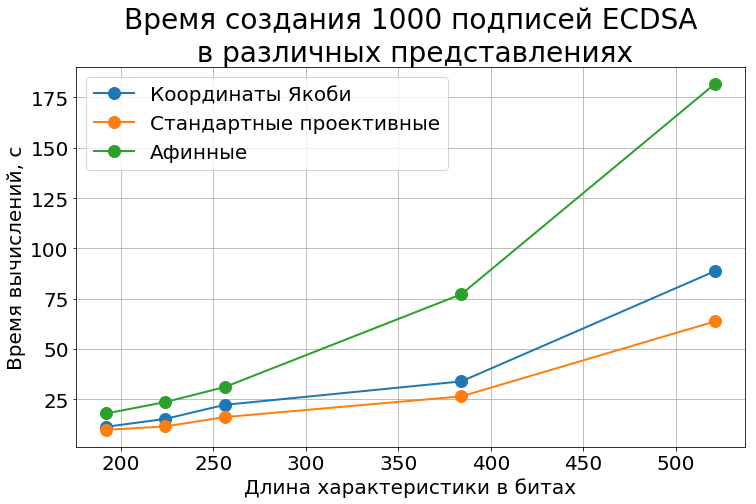

In [6]:
fig = plt.figure(figsize=(12, 7))
majorLocator   = MultipleLocator(50)
ax = fig.add_subplot(111)
ax.plot(x, y_ecdsa_jac, marker='o', label=u"Координаты Якоби")
ax.plot(x, y_ecdsa_proj, marker='o', label=u"Стандартные проективные")
ax.plot(x, y_ecdsa_aff, marker='o', label=u"Афинные")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(majorLocator)
plt.xlabel(u"Длина характеристики в битах")
plt.ylabel(u"Время вычислений, с")
plt.title(u"Время создания 1000 подписей ECDSA\n в различных представлениях")
plt.savefig('./article/familia/ecdsa_times.eps')

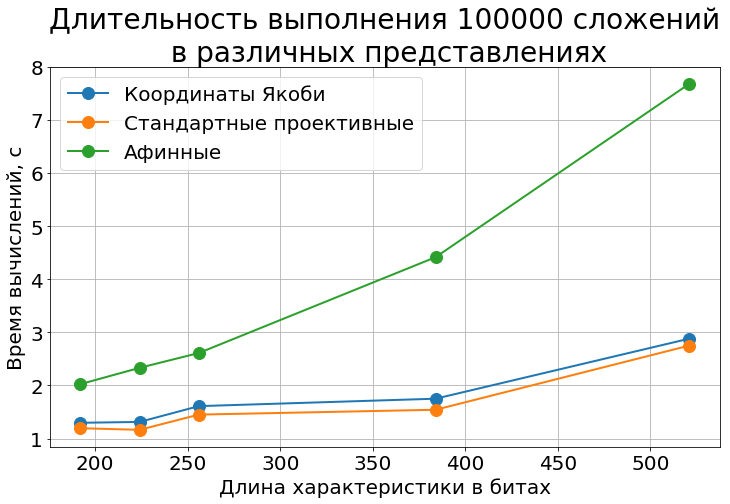

In [9]:
fig = plt.figure(figsize=(12, 7))
majorLocator   = MultipleLocator(50)
ax = fig.add_subplot(111)
ax.plot(x, y_sum_jac, marker='o', label=u"Координаты Якоби")
ax.plot(x, y_sum_proj, marker='o', label=u"Стандартные проективные")
ax.plot(x, y_sum_aff, marker='o', label=u"Афинные")
ax.grid(True)
ax.legend()
ax.xaxis.set_major_locator(majorLocator)
plt.xlabel(u"Длина характеристики в битах")
plt.ylabel(u"Время вычислений, с")
plt.title(u"Длительность выполнения 100000 сложений\n в различных представлениях")
plt.savefig('./article/familia/sum_times.eps')

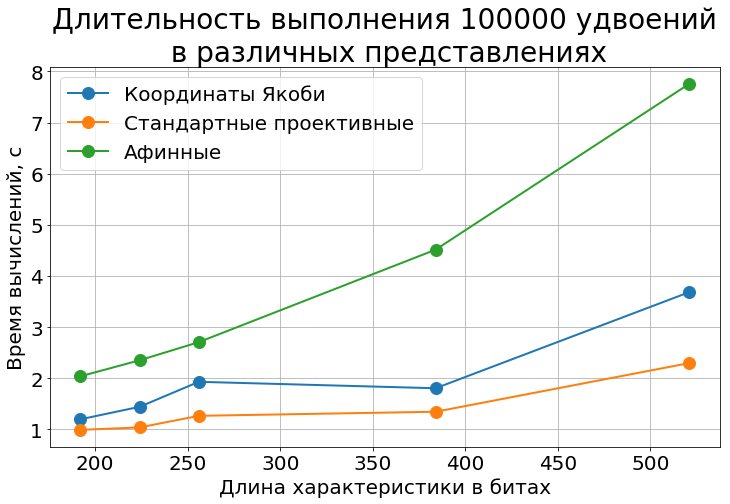

In [10]:
fig = plt.figure(figsize=(12, 7))
majorLocator   = MultipleLocator(50)
ax = fig.add_subplot(111)
ax.plot(x, y_double_jac, marker='o', label=u"Координаты Якоби")
ax.plot(x, y_double_proj, marker='o', label=u"Стандартные проективные")
ax.plot(x, y_double_aff, marker='o', label=u"Афинные")
ax.grid(True)
ax.legend()
ax.xaxis.set_major_locator(majorLocator)
plt.xlabel(u"Длина характеристики в битах")
plt.ylabel(u"Время вычислений, с")
plt.title(u"Длительность выполнения 100000 удвоений\n в различных представлениях")
plt.savefig('./article/familia/double_times.eps')